# Lec 3- Reasoning about Assignment, Conditionals, and Loops

In [1]:
import sys

# Part 1. Assignment (=)

## 1. Reasoning About Assignment Statement

**Formal Analysis:** `variable = expression`

**Operational Semantics (Step-by-step):**
1. Evaluate the *expression* on the right-hand side. This results in a value (an object).
2. Bind the *variable* name on the left-hand side to that object in the current namespace.

**Key Insight:** Assignment is destructive - the old value is lost unless saved.


## Swaping Two Numbers


In [3]:
def swap_temp (x, y):
    
    temp = x
    
    x = y
    
    y = temp
    
    return x, y

In [6]:
swap_temp (2,3)

(3, 2)

In [5]:
swap_temp ('one', 'two')

('two', 'one')

### 1.1 Correctness: (Attempt 1) Let's try to prove some properties of this function

**Key Insight:** Assignment is destructive - the old value is lost unless saved.

In [ ]:
def swap_temp1 (x, y):
    
    temp = x
    assert temp == x, "Failed at 1"
    
    x = y
    #assert temp == x and x == y, "Failed at 2" 
    assert x == y, "Failed at 2" 
    
    y = temp
    #assert temp == x and x == y and y ==temp, "Failed at 3"
    assert y ==temp, "Failed at 3"
    
    return x, y

In [ ]:
swap_temp1 (2,3)

In [4]:
pause

NameError: name 'pause' is not defined

### 1.2 Correctness: (Attempt 2) Correct Specification using ghost variable
**Key Insight:** Capture pre-state using ghost/logical variables for verification

In [7]:
def swap_temp_verified (x, y):
    
    x_orig, y_orig = x, y  # Capture original state for reasoning (using ghost variables)
    
    temp = x
    
    x = y
    
    y = temp
    
    # Verification
    assert x == y_orig and y == x_orig, "Swap failed!"
    return x, y

In [8]:
swap_temp_verified ('x', 2)

(2, 'x')

### 1.3 Error: (Attempt 3) Correct Specification but Wrong Implementation 
**Key Insight:** Correct Specifications can help us detect buggy code generated by Humans/LLMs

In [9]:
def swap_temp_verified (x, y):
    
    # Verification Precondition
    x_orig, y_orig = x, y  # Capture original state for reasoning (using ghost variables)
    
    temp = x
    
    #x = y
    
    y = temp
    
    # Verification Postcondition
    assert x == y_orig and y == x_orig, "Swap failed!"
    return x, y

In [10]:
swap_temp_verified ('x', 2)

AssertionError: Swap failed!

### 1.4 Complete Proof: (Attempt 4) Correct Specification, Implementation and Annotation 
**Key Insight:** Correct Specifications together with intermediate annotations can help us prove the correctness of code. Partial programs/ code segments also has some purpose, which can/should be annotated properly for defensive programming 

In [11]:
def swap_temp_verified (x, y):
    
    # Verification Precondition
    x_orig, y_orig = x, y  # Capture original state for reasoning (using ghost variables)
    
    temp = x
    assert temp == x_orig, "Failed at 1"
    
    x = y
    assert temp == x_orig and x == y_orig, "Failed at 2"
    
    y = temp
    assert y ==temp and temp == x_orig and x == y_orig, "Failed at 3"
    
    # Verification Postcondition
    assert x == y_orig and y == x_orig, "Swap failed!"
    return x, y

In [12]:
swap_temp_verified ('x', 2)

(2, 'x')

### 1.5 Example (Risky) Swaps:  Use Specification and Annotations to figure out possible Bugs
**TODO:** Analyse the code as disciussed for the previous examples

In [ ]:
def swap_risky_sum(x, y):
    x_orig, y_orig = x, y
    x = x + y
    y = x - y  # Now y equals original x ??
    x = x - y  # Now x equals original y ?? 
    # Verification - this may fail ??
    assert x == y_orig and y == x_orig, f"Risky swap failed! x={x}, y={y}, expected x={y_orig}, y={x_orig}"
    return x, y

In [ ]:
def swap_risky_mult(x, y):
    x_orig, y_orig = x, y
    x = x * y
    y = x / y  # Now y equals original x ??
    x = x / y  # Now x equals original y ?? 
    # Verification - this may fail ??
    assert x == y_orig and y == x_orig, f"Risky swap failed! x={x}, y={y}, expected x={y_orig}, y={x_orig}"
    return x, y

# Part 2. Branching (if then else)

##  Reasoning About Conditional Statements

**Formal Analysis:** `if condition: ... elif condition: ... else: ...`

**Operational Semantics (Step-by-step):**
1. Evaluate the *condition* expression after the `if` keyword. This results in a boolean value (`True` or `False`).
2. If the condition evaluates to `True`, execute the indented block of code under the `if` statement, then skip all subsequent `elif` and `else` blocks.
3. If the condition evaluates to `False`, proceed to evaluate the next `elif` condition (if any exists).
4. If all `if` and `elif` conditions are `False`, execute the `else` block (if present).

**Key Insight:** Only one branch executes - the first condition that evaluates to `True`, or the `else` block if no conditions are `True`.


**Example:**
```python
# Example
temperature = 30
if temperature > 25:
    print("It's hot")
    activity = "swim"
elif temperature > 15:
    print("It's pleasant")
    activity = "walk"
else:
    print("It's cold")
    activity = "read"
```

##  Maximum of Three Numbers

```python
def max_of_three(a, b, c):
    
    if a >= b:
        if a >= c:
            result = a
        else:
            result = c
    else:
        if b >= c:
            result = b
        else:
            result = c
    
    return result
```

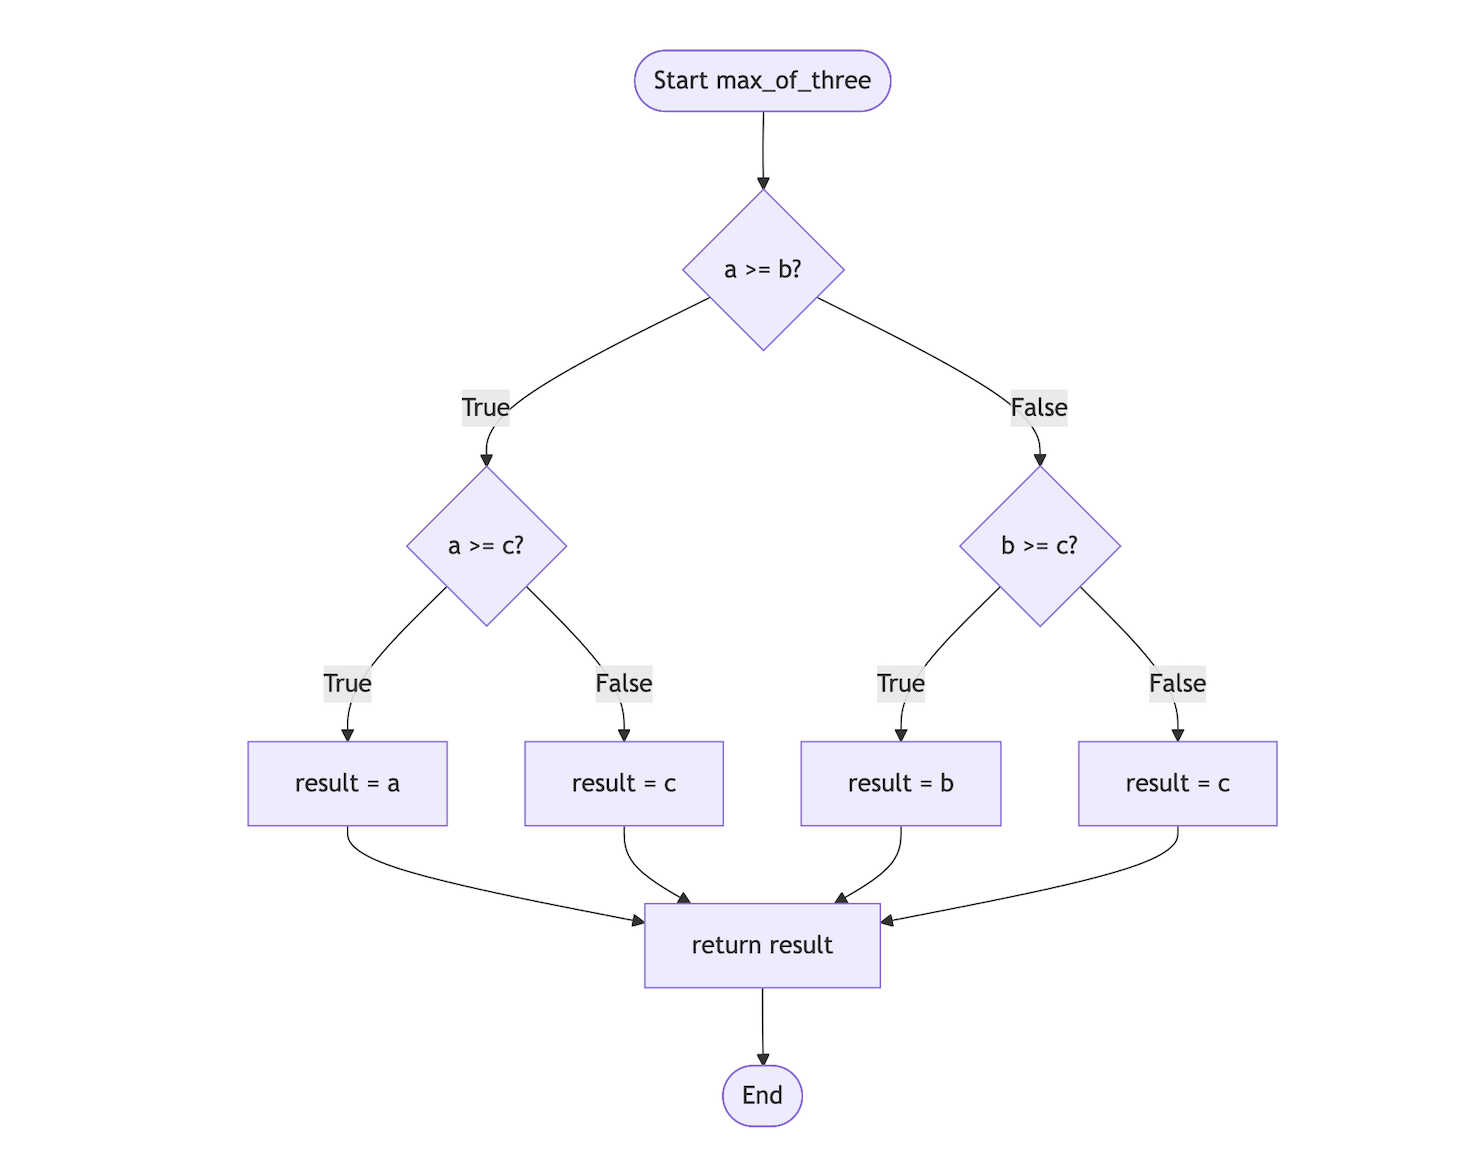



## 2.1 Correctness: (Attempt 1) Correct Implementation

In [13]:
def max_of_three(a, b, c):
    
    if a >= b:
        if a >= c:
            result = a
        else:
            result = c
    else:
        if b >= c:
            result = b
        else:
            result = c
    
    return result

In [14]:
max_of_three(2,3,0)

3

In [15]:
max_of_three(-2,-3,0)

0

## 2.2 Correctness: (Attempt 2) Correct Specification

In [16]:
def max_of_three(a, b, c):
    # Desired property: returns the largest of a, b, c
    
    if a >= b:
        if a >= c:
            result = a
        else:
            result = c
    else:
        if b >= c:
            result = b
        else:
            result = c
    
    # Correct Specification
    assert result >= a and result >= b and result >= c, "Result is not maximum!"
    
    return result

In [17]:
max_of_three(2,3,0)

3

In [18]:
max_of_three(2,3,10)

10

In [19]:
max_of_three(20,3,0)

20

In [20]:
max_of_three(2,30,0)

30

## 2.3 Correctness: (Attempt 3) Correct Specification but "Incorrect" Implementation

In [21]:
def max_of_three(a, b, c):
    # Desired property: returns the largest of a, b, c
    
    if a >= b:
        if a >= c:
            result = a
        else:
            result = c
    else:
        if b >= c:
            result = 100
        else:
            result = c
    
    # Correct Specification
    assert result >= a and result >= b and result >= c, "Result is not maximum!"
    
    return result

In [22]:
max_of_three(2,-3,0)

2

In [23]:
max_of_three(2,3,10)

10

In [24]:
max_of_three(20,30,100)

100

In [25]:
max_of_three(20,30,10)

100

## 2.4 Correctness: (Attempt 4) Correct and Strong Specification

In [27]:
def max_of_three(a, b, c):
    # Desired property: returns the largest of a, b, c
    
    if a >= b:
        if a >= c:
            result = a
        else:
            result = c
    else:
        if b >= c:
            result = 100
            #result = b
        else:
            result = c
    
    # Verification: Correct and Strong Specification.
    assert result >= a and result >= b and result >= c, "Result is not maximum!"
    assert result == a or result == b or result == c, "Result not among inputs!"
    return result

In [28]:
max_of_three(20,30,10)   ## Instead of 30 result contains 100 which violates second assertion

AssertionError: Result not among inputs!

# Part 3. Introducing Loops

## **3.1 The Need for Loops**
*   **Problem:** How to find maximum in a list of unknown size?
*   Fixed approach doesn't scale: `max(max(a,b), c)` works for 3, but what about 1000?
*   **Solution:** We need a way to repeat operations dynamically - loops!

## **3.2 The `while` Loop for List Traversal**

In [29]:
def find_max(numbers):
    # Desired property: returns the largest element in non-empty list 'numbers'
    assert len(numbers) > 0, "List must not be empty"
    
    max_so_far = numbers[0]
    i = 1
    n = len(numbers)
    
    
    while i < n:
        
        # Process current element
        if numbers[i] > max_so_far:
            max_so_far = numbers[i]
        
        i = i + 1
        # Invariant is maintained: max_so_far now contains max of numbers[0..i-1]
    
    # Termination: i == n, so by invariant, max_so_far contains max of numbers[0..n-1]
    
    return max_so_far

In [30]:
find_max ([1,5,6,3,4,8,9,2])

9

In [31]:
find_max ([1,5,6,13,4,8,9,2])

13

In [32]:
find_max ([11,5,6,3,4,8,9,2])

11

### Control Flow Diagram for find_max

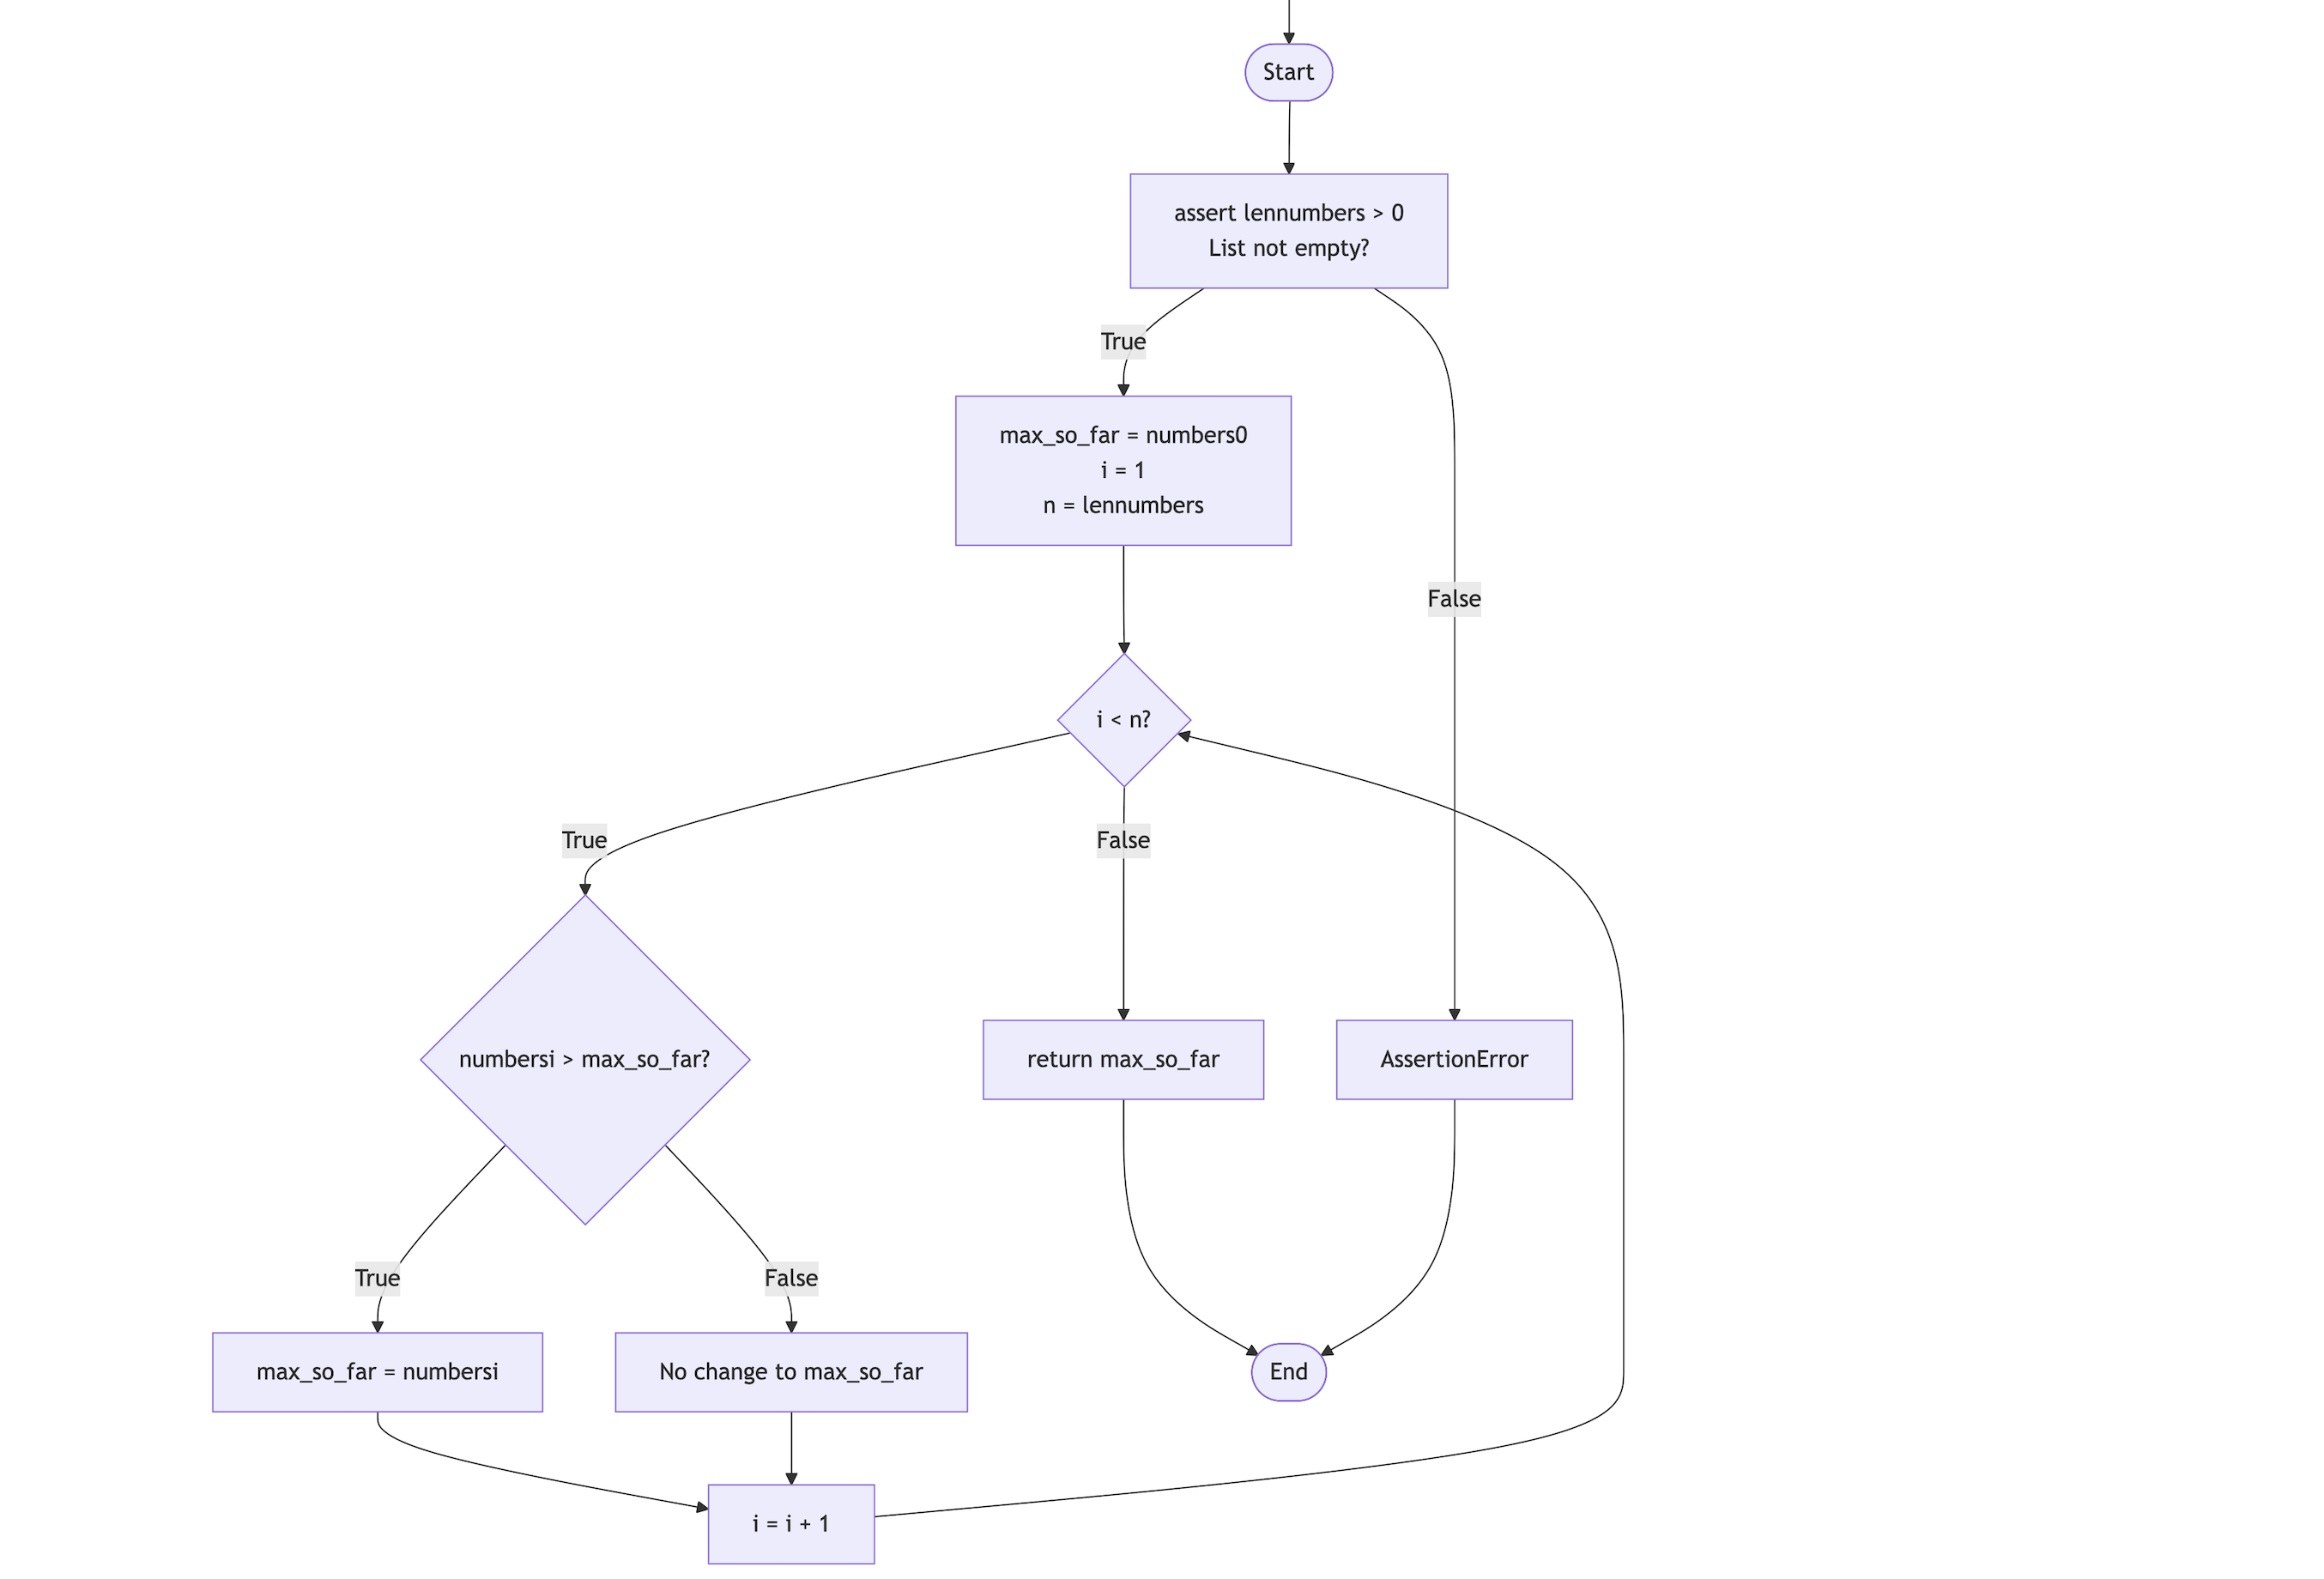

## **3.3 Formal Reasoning with Loop Invariants**
*   **Initialization:** Before first iteration, `i=1`, `max_so_far = numbers[0]`
    *   Upper bound: `numbers[0] ≥ numbers[0]` ✓
    *   Attainment: `numbers[0] == numbers[0]` ✓
*   **Maintenance:** If invariant holds at start of iteration, after processing `numbers[i]` and incrementing `i`, invariant holds for new `i`
    *   If `numbers[i] > max_so_far`, new max is `numbers[i]` which satisfies both properties
    *   Otherwise, `max_so_far` unchanged and still satisfies both properties
*   **Termination:** When loop exits, `i == n`, so by invariant, `max_so_far` contains max of `numbers[0..n-1]` - exactly our desired result!

# Logical Axiom for While Loops

## While Rule (Partial Correctness)

**Formal Notation:**
```
{P ∧ B} C {P}
---------------------------- [While]
{P} while B do C {P ∧ ¬B}
```

**Components:**
- **P**: Loop invariant (must be true before, during, and after the loop)
- **B**: Loop condition (boolean expression)
- **C**: Loop body (statement(s) to execute while B is true)

## Explanation

### Precondition and Postcondition
- **Precondition**: The invariant P holds before entering the loop
- **Postcondition**: The invariant P still holds AND the loop condition B is false

### Key Requirement
The triple `{P ∧ B} C {P}` must be provable, meaning:
- If the invariant P holds AND the condition B is true
- After executing the loop body C
- The invariant P still holds

This ensures the invariant is **maintained** through each iteration.


This logical axiom forms the foundation for proving correctness of iterative programs.

## **3.4 Revisiting find_max with Loop Invariants**

**Formal Notation:**
```
{P ∧ B} C {P}
---------------------------- [While]
{P} while B do C {P ∧ ¬B}
```

In [ ]:
def find_max(numbers):
    # Desired property: returns the largest element in non-empty list 'numbers'
    assert len(numbers) > 0, "List must not be empty"
    
    max_so_far = numbers[0]
    i = 1
    n = len(numbers)
    
    # Loop Invariant: At the start of each iteration, 
    # max_so_far contains the maximum of numbers[0..i-1]
    
    while i < n:
        # Check invariant 
        # Mathematical definition: max_so_far = max{numbers[j] | 0 ≤ j < i}
        # This means:
        # (1) ∀j < i: max_so_far ≥ numbers[j]  (upper bound property)
        # (2) ∃j < i: max_so_far = numbers[j]  (attainment property)
        
        # Check condition (1) - universal quantifier
        for j in range(i):
            assert max_so_far >= numbers[j], f"Upper bound violated at index {j}"
        
        # Check condition (2) - existential quantifier  
        attainment_ok = any(numbers[j] == max_so_far for j in range(i))
        assert attainment_ok, f"Value {max_so_far} not attained in prefix"
        
        # Process current element
        if numbers[i] > max_so_far:
            max_so_far = numbers[i]
        
        i = i + 1
        # Invariant is maintained: max_so_far now contains max of numbers[0..i-1]
    
    # Termination: i == n, so by invariant, max_so_far contains max of numbers[0..n-1]
    
    # Final verification using the same quantifier approach
    for j in range(n):
        assert max_so_far >= numbers[j], f"Final result not an upper bound at index {j}"
    final_attainment = any(numbers[j] == max_so_far for j in range(n))
    assert final_attainment, f"Final value {max_so_far} not in list"
    
    return max_so_far

In [ ]:
find_max([1,12,3,4,6])

## **3.5 Alternative with `for` Loop**
```python
def find_max_for(numbers):
    assert len(numbers) > 0, "List must not be empty"
    
    max_so_far = numbers[0]
    
    # Loop Invariant: After k iterations, max_so_far contains max of numbers[0..k]
    for i in range(1, len(numbers)):
        # Invariant holds at start of iteration for current i
        
        # Verify invariant using quantifiers
        for j in range(i):
            assert max_so_far >= numbers[j]
        assert any(numbers[j] == max_so_far for j in range(i))
        
        # Update if needed
        if numbers[i] > max_so_far:
            max_so_far = numbers[i]
        # Invariant maintained for next iteration
    
    # Final verification
    for j in range(len(numbers)):
        assert max_so_far >= numbers[j]
    assert any(numbers[j] == max_so_far for j in range(len(numbers)))
    
    return max_so_far
```
*   **Comparison:** `for` loop handles counter management automatically, making code more concise
*   **Same reasoning principles apply:** We still use and maintain the loop invariant with explicit quantifiers

**TODO:** Play with this code to check assertion validation!

# Part 4. **Hoare Logic Rules for Program Correctness**

## **Hoare Triple Notation**
- `{P} S {Q}`: If precondition `P` holds before executing statement `S`, then postcondition `Q` will hold after `S` terminates

## **Assignment Rule (Axiom)**
```
{ Q[x ↦ E] } x = E { Q }
```
Where `Q[x ↦ E]` means substitute all occurrences of `x` in `Q` with expression `E`.

### **Examples:**
1. **Simple assignment:**
   ```
   { y = 5 } x = y { x = 5 }
   ```
   Here: `Q` is `x = 5`, `E` is `y`, so `Q[x ↦ E]` is `y = 5`

2. **Arithmetic:**
   ```
   { x + 1 > 0 } x = x + 1 { x > 0 }
   ```
   `Q` is `x > 0`, `E` is `x + 1`, so `Q[x ↦ E]` is `x + 1 > 0`

## **Conditional Rule (If-Then-Else)**
```
{ P ∧ B } S₁ { Q }    { P ∧ ¬B } S₂ { Q }
------------------------------------------------
        { P } if B then S₁ else S₂ { Q }
```

### **Example: Absolute Value**
```python
# { True }
if x < 0:
    # { True ∧ x < 0 } ≡ { x < 0 }
    abs_val = -x
    # { abs_val = -x ∧ x < 0 } ⇒ { abs_val ≥ 0 }
else:
    # { True ∧ x ≥ 0 } ≡ { x ≥ 0 }
    abs_val = x
    # { abs_val = x ∧ x ≥ 0 } ⇒ { abs_val ≥ 0 }
# { abs_val ≥ 0 }
```

## **Sequence Rule**
```
{ P } S₁ { R }    { R } S₂ { Q }
----------------------------------
        { P } S₁; S₂ { Q }
```

### **Example: Swapping Variables**
```python
# { x = a ∧ y = b }
temp = x
# { temp = a ∧ x = a ∧ y = b } ⇒ { temp = a ∧ y = b }
x = y
# { temp = a ∧ x = b ∧ y = b } ⇒ { x = b ∧ temp = a }
y = temp
# { x = b ∧ y = a }
```

## **While Loop Rule**
```
{ P ∧ B } S { P }
---------------------------------
{ P } while B do S { P ∧ ¬B }
```
Where `P` is the **loop invariant** that remains true throughout the loop.

### **Example: Summation**
```python
# Invariant P: total = sum of 1 to (i-1)
# { total = 0 ∧ i = 1 } ⇒ P holds initially
while i <= n:
    # { P ∧ i ≤ n } ≡ { total = sum(1..i-1) ∧ i ≤ n }
    total = total + i
    # { total = sum(1..i) }
    i = i + 1
    # { total = sum(1..i-1) } ≡ P restored
# { P ∧ i > n } ⇒ { total = sum(1..n) }
```

## **Consequence Rules**
```
P ⇒ P₁    { P₁ } S { Q₁ }    Q₁ ⇒ Q
-------------------------------------
            { P } S { Q }
```

## **Practical Application in Our Code**

### **Assignment with Verification:**
```python
# Precondition: { x = x₀ ∧ y = y₀ }
temp = x
# Intermediate: { temp = x₀ ∧ x = x₀ ∧ y = y₀ }
x = y
# Intermediate: { temp = x₀ ∧ x = y₀ ∧ y = y₀ }
y = temp
# Postcondition: { x = y₀ ∧ y = x₀ }
```

### **Conditional with Verification:**
```python
# Precondition: { True }
if a >= b and a >= c:
    # { a ≥ b ∧ a ≥ c }
    result = a
    # { result = a ∧ a ≥ b ∧ a ≥ c } ⇒ { result is maximum }
elif b >= a and b >= c:
    # { b ≥ a ∧ b ≥ c }
    result = b
    # { result = b ∧ b ≥ a ∧ b ≥ c } ⇒ { result is maximum }
else:
    # { c ≥ a ∧ c ≥ b }
    result = c
    # { result = c ∧ c ≥ a ∧ c ≥ b } ⇒ { result is maximum }
# Postcondition: { result is maximum of a, b, c }
```

These rules provide the formal foundation for the reasoning we apply when using assertions and invariants in our code verification.

# Part 5: Additional Examples - Factorial and GCD 

## **5.1 Factorial with Loop Invariant**

### **Mathematical Definition**
- `0! = 1`
- `n! = n × (n-1)!` for `n > 0`

### **Implementation with Formal Reasoning**
```python
def factorial(n):
    assert n >= 0, "n must be non-negative"
    
    result = 1
    i = 1
    
    # Loop Invariant: At start of iteration, result = (i-1)!
    while i <= n:
        # Verify invariant holds at start of iteration
        expected = 1
        for j in range(1, i):  # Manual computation of (i-1)!
            expected *= j
        assert result == expected, f"Invariant broken: result={result}, expected (i-1)!={expected}"
        
        result = result * i    # Now result becomes i!
        i = i + 1
        # Invariant maintained: result now equals i! for the NEXT iteration
    
    # Termination: i = n+1, so by invariant, result = ((n+1)-1)! = n!
    # Final verification without math.factorial
    final_expected = 1
    for j in range(1, n+1):
        final_expected *= j
    assert result == final_expected, f"Final result incorrect: {result} vs {final_expected}"
    
    return result
```

### **Hoare Logic Reasoning**
```
{ n ≥ 0 }
result = 1
i = 1
{ Invariant: result = (i-1)! ∧ 1 ≤ i ≤ n+1 }
while i ≤ n:
    { result = (i-1)! ∧ i ≤ n }
    result = result × i
    { result = i! }
    i = i + 1
    { result = (i-1)! }
{ result = (i-1)! ∧ i > n } ⇒ { result = n! }
```

---

## **5.2 GCD using Euclidean Algorithm**

### **Mathematical Properties**
- `gcd(a, 0) = a`
- `gcd(a, b) = gcd(b, a mod b)` for `b > 0`

### **Implementation with Formal Reasoning** (Check Errors if any..)
```python
def gcd(a, b):
    assert a > 0 and b > 0, "Numbers must be positive"
    
    x, y = a, b
    # Loop Invariant: gcd(x, y) == gcd(a, b)
    
    while y != 0:
        # Verify invariant using mathematical properties
        # We manually check: gcd(x, y) should equal gcd(a, b)
        # Using the property: gcd(x, y) = gcd(y, x % y)
        
        # Store previous values for verification
        old_x, old_y = x, y
        
        # Euclidean algorithm step
        x, y = y, x % y
        
        # Verify invariant is maintained
        # gcd(new_x, new_y) should equal gcd(old_x, old_y)
        # This holds because: gcd(old_x, old_y) = gcd(old_y, old_x % old_y) = gcd(new_x, new_y)
        # We can verify by checking divisibility properties
        assert old_x % x == 0 or old_y % x == 0, "GCD relationship broken"
    
    # Termination: y == 0, so gcd(a, b) = gcd(x, 0) = x
    # Final verification using the definition of GCD
    assert a % x == 0, f"{a} not divisible by result {x}"
    assert b % x == 0, f"{b} not divisible by result {x}"
    
    # Verify it's the greatest by checking no larger number divides both
    for d in range(x + 1, min(a, b) + 1):
        assert not (a % d == 0 and b % d == 0), f"Larger divisor {d} found"
    
    return x
```

### **Key Mathematical Insight**
The Euclidean algorithm preserves the GCD through iterations:
```
gcd(a, b) = gcd(b, a mod b) = gcd(a mod b, b mod (a mod b)) = ...
```

### **Hoare Logic Reasoning**
```
{ a > 0 ∧ b > 0 }
x, y = a, b
{ Invariant: gcd(x, y) = gcd(a, b) }
while y ≠ 0:
    { gcd(x, y) = gcd(a, b) ∧ y ≠ 0 }
    x, y = y, x mod y
    { gcd(x, y) = gcd(old_x, old_y) = gcd(a, b) }
{ gcd(x, y) = gcd(a, b) ∧ y = 0 } ⇒ { x = gcd(a, b) }
```

### **Why This Verification Matters**
- **GCD Preservation**: Each transformation maintains the GCD relationship
- **Termination**: `y` strictly decreases in each iteration (since `x % y < y`)
- **Correctness**: When `y = 0`, `gcd(x, 0) = x` by definition

These examples demonstrate how loop invariants and formal reasoning apply to fundamental mathematical algorithms, providing strong guarantees of correctness beyond simple testing.